# Merger rate density evolution with redshift

* Number of compact binary mergers per unit time per unit volume

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# calling necessary class from ler package
from ler.gw_source_population import SourceGalaxyPopulationModel

In [2]:
# uncomment the following line to see the docstring
# SourceGalaxyPopulationModel?

In [3]:
# class initialization
# default model "BBH popI/II Oguri2018"
cbc = SourceGalaxyPopulationModel()

# list out the models for the merger rate density wrt redshift
cbc.model_list

['merger_rate_density_bbh_popI_II_oguri2018',
 'star_formation_rate_madau_dickinson2014',
 'merger_rate_density_bbh_popIII_ken2022',
 'merger_rate_density_primordial_ken2022']

### Plotting differential comoving volume

* This important to understand why the source frame merger rate decreases with redshift
* This is with planck18 cosmology. `ler` allows you to change the cosmology.
* $1/E (z)$: derivative of comoving distance with redshift, $D_c(z)$: comoving distance, $H_0$: Hubble constant, $c$: speed of light

\begin{equation}
\frac{dV_c}{dz} = 4\pi \frac{c}{H_0} \frac{(1+z)^2 D_c^2(z)}{E(z)}
\end{equation}

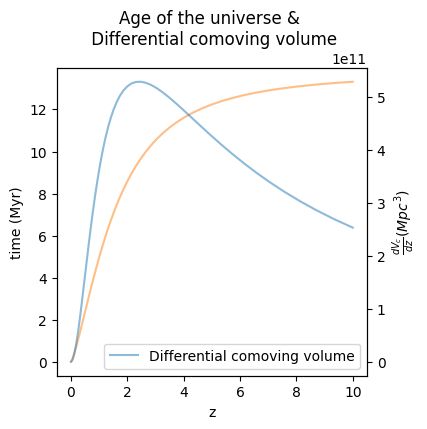

In [4]:
# age of the universe (from present day) in years wrt to redshift
# consider z=0 corresponds to present day t=0
z = np.geomspace(0.001, 10, 100)
t = 13.786885302009708-cbc.cosmo.age(z).value

# differential comoving volume wrt to redshift
z = np.geomspace(0.01, 10, 100)
dVc_dz = cbc.differential_comoving_volume(z)

# plot the differential comoving volume and age of the universe
# show differential comoving volume scale on the right y-axis
# show age of the universe scale on the left y-axis
plt.figure(figsize=(4,4))
plt.plot(z, t, color='C1', linestyle='-', alpha=0.5, label="Age of the universe")
plt.ylabel("time (Myr)")
plt.xlabel("z")
plt.twinx()
plt.plot(z, dVc_dz, color='C0', linestyle='-', alpha=0.5, label="Differential comoving volume")
plt.ylabel(r"$\frac{dV_c}{dz} (Mpc^3)$")
plt.title("Age of the universe & \n Differential comoving volume")
plt.legend()
plt.show()

### Merger rate evolution with redshift (detector frame)

In [5]:
z_min = 0.0
z_max = 10.0
# class initialisation
cbc = SourceGalaxyPopulationModel(z_min=z_min, 
                                  z_max=z_max,
                                  merger_rate_density="merger_rate_density_bbh_popI_II_oguri2018")

In [6]:
# looking for local merger rate density (R0)
# by default, it uses results from Renske et al 2021
cbc.merger_rate_density(zs=0.0)  # in units of Mpc^-3 yr^-1

2.39e-08

#### Plots with uncertainties in local merger rate density

* [Renske et al. 2022](https://arxiv.org/pdf/2106.06303.pdf) , $\text{R0} = 23.9^{+14.3}_{-8.6} \times 10^{-9} Mpc^{-3} yr^{-1}$
* `ler` allows you to change input parameters for the merger rate density model
* with results from [GWTC-3, PDB (pair) model](https://arxiv.org/pdf/2111.03634.pdf):

    | Model | $\mathcal{R}_O$ |
    | :-: | :-: |
    | BNS | $170^{+270}_{-120}$ |
    | BBH | $25^{+10}_{-7}$ |
    | NSBH | $27^{+31}_{-17}$ |

* Note: uncertainties in local merger rate density of BNS is much larger than BBH and NSBH

### BBH

In [7]:
z = np.geomspace(0.01, 5.0, 100)

# getting the median values of zs distribution (source frame)
# det: detector frame, src: source frame
param = dict(R0=25 * 1e-9, b2=1.6, b3=2.0, b4=30)
bbh_density_median_det = cbc.merger_rate_density(z, param=param)

# getting the lower bound values of zs distribution (source frame)
param = dict(R0=(25-7) * 1e-9, b2=1.6, b3=2.0, b4=30)
bbh_density_low_det = cbc.merger_rate_density(z, param=param)

# getting the upper bound values of zs distribution (source frame)
param = dict(R0=(25+10) * 1e-9, b2=1.6, b3=2.0, b4=30)
bbh_density_up_det = cbc.merger_rate_density(z, param=param)

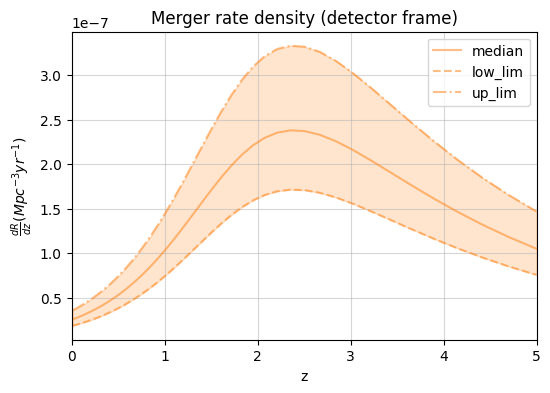

In [8]:
# fill between zs_low and zs_up

# bbh
plt.figure(figsize=(6,4))
plt.plot(z, bbh_density_median_det, color='C1', linestyle='-', alpha=0.5, label="median")
plt.plot(z, bbh_density_low_det, color='C1', linestyle='--', alpha=0.5, label="low_lim")
plt.plot(z, bbh_density_up_det, color='C1', linestyle='-.', alpha=0.5, label="up_lim")
plt.fill_between(z, bbh_density_low_det, bbh_density_up_det, color='C1', alpha=0.2)

# labels
plt.xlabel("z")
plt.ylabel(r"$\frac{dR}{dz} (Mpc^{-3} yr^{-1})$")
#plt.yscale("log")
plt.xlim(0, 5)
plt.legend() 
plt.grid(alpha=0.5)
plt.title("Merger rate density (detector frame)")
plt.show()

### BNS

In [9]:
z = np.geomspace(0.01, 5.0, 100)

# getting the median values of zs distribution (source frame)
# det: detector frame, src: source frame
param = dict(R0=170 * 1e-9, b2=1.6, b3=2.0, b4=30)
bns_density_median_det = cbc.merger_rate_density(z, param=param)

# getting the lower bound values of zs distribution (source frame)
param = dict(R0=(170-120) * 1e-9, b2=1.6, b3=2.0, b4=30)
bns_density_low_det = cbc.merger_rate_density(z, param=param)

# getting the upper bound values of zs distribution (source frame)
param = dict(R0=(170+270) * 1e-9, b2=1.6, b3=2.0, b4=30)
bns_density_up_det = cbc.merger_rate_density(z, param=param)

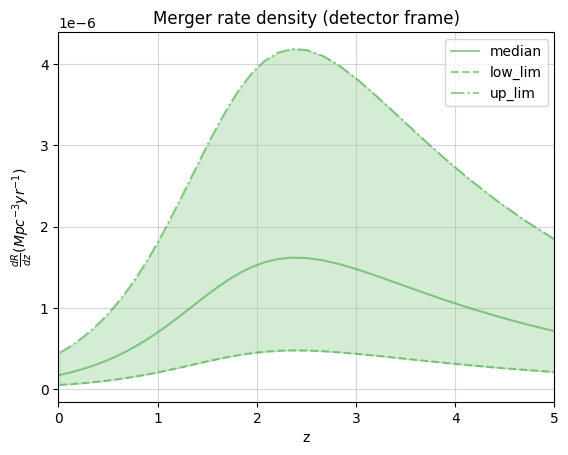

In [10]:
# fill between zs_low and zs_up

# bns
plt.plot(z, bns_density_median_det, color='C2', linestyle='-', alpha=0.5, label="median")
plt.plot(z, bns_density_low_det, color='C2', linestyle='--', alpha=0.5, label="low_lim")
plt.plot(z, bns_density_up_det, color='C2', linestyle='-.', alpha=0.5, label="up_lim")
plt.fill_between(z, bns_density_low_det, bns_density_up_det, color='C2', alpha=0.2)

# labels
plt.xlabel("z")
plt.ylabel(r"$\frac{dR}{dz} (Mpc^{-3} yr^{-1})$")
#plt.yscale("log")
plt.xlim(0, 5)
plt.legend() 
plt.grid(alpha=0.5)
plt.title("Merger rate density (detector frame)")
plt.show()

### Redshift distribution (BBH)

* The redshift distribution of the BBH merger should follow the merger rate density distribution.
* The redshift distribution (source frame) of the BBH merger is given by the merger rate density distribution multiplied by the differential comoving volume and the time dilation factor.
* It is then normalized to unity in the redshift range $z_{min}<z<z_{max}$. 

In [11]:
z_min = 0.0
z_max = 5.0
# class initialisation
cbc = SourceGalaxyPopulationModel(z_min=z_min, 
                                  z_max=z_max,
                                  merger_rate_density="merger_rate_density_bbh_popI_II_oguri2018")
# detector frame
rate1_det = cbc.merger_rate_density
# normalised to 1
norm1 = quad(rate1_det, z_min, z_max)[0]
rate1_det = rate1_det(z) / norm1

# source frame
rate1_src = cbc.merger_rate_density_src_frame
# normalised to 1
rate1_src = rate1_src(z) / cbc.normalization_pdf_z

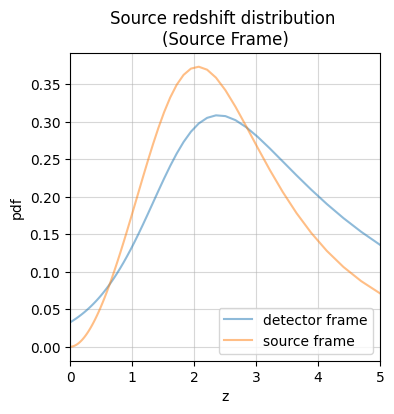

In [12]:
# plot the merger rate density
plt.figure(figsize=(4,4))
plt.plot(z, rate1_det, color='C0', linestyle='-', alpha=0.5, label="detector frame")
plt.plot(z, rate1_src, color='C1', linestyle='-', alpha=0.5, label="source frame")
plt.xlim(0, 5)
# labels
plt.xlabel("z")
plt.ylabel(r"pdf")
plt.legend()
plt.grid(alpha=0.5)
plt.title("Source redshift distribution \n(Source Frame)")
plt.show()